# **Importing dataset**

We only use this git for using it's dataset

In [ ]:
!git clone https://github.com/gurkandemir/Bag-of-Visual-Words.git

Cloning into 'Bag-of-Visual-Words'...
remote: Enumerating objects: 891, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 891 (delta 0), reused 6 (delta 0), pack-reused 882
Receiving objects: 100% (891/891), 163.07 MiB | 13.94 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (1020/1020), done.


In [ ]:
!rm -r /content/dataset
!mkdir /content/dataset
!mkdir /content/dataset/train
!mkdir /content/dataset/test

!cp -r /content/Bag-of-Visual-Words/dataset/train/house_building /content/dataset/train
!cp -r /content/Bag-of-Visual-Words/dataset/train/house_indoor /content/dataset/train

!cp -r /content/Bag-of-Visual-Words/dataset/train/house_building /content/dataset/test
!cp -r /content/Bag-of-Visual-Words/dataset/train/house_indoor /content/dataset/test

rm: cannot remove '/content/dataset': No such file or directory


# **Loading dataset**

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from google.colab.patches import cv2_imshow

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if(filename == 'house_building'):
            label = 0

        elif(filename == 'house_indoor'):
            label = 1

        path = folder + "/" + filename
        for cat in os.listdir(path):
            img = cv2.imread(path + "/" + cat,0)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                images.append(img)
                labels.append(label)
    return [images, labels]

x_train, y_train = load_images_from_folder('/content/dataset/train/')  # take all images category by category
x_test, y_test = load_images_from_folder("/content/dataset/test/") # take test images

<class 'numpy.ndarray'>
1


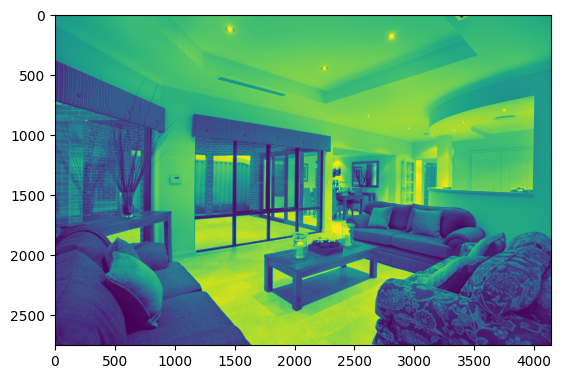

In [ ]:
plt.imshow(x_train[100])
print(type(x_train[100]))
print(y_train[100])

# **Sift**

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
des = []
for img in x_train:
    kp1,des1 =sift.detectAndCompute(img,None)
    if des1 is not None:
        des.append(des1)

print(type(des))

<class 'list'>


In [ ]:
des_list = []
for i in (des):
    for j in i:
          des_list.append(j)
print(len(des_list))

439703


# **K-Means**

In [ ]:
kmeans = KMeans(n_clusters=10,random_state=0).fit(des_list)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids = kmeans.cluster_centers_

# **Histogram**

In [ ]:
hist_train = np.zeros((len(des),10))
for i in range(len(des)):
    run = kmeans.predict(des[i].astype(float))
    for k in run:
        hist_train[i][k]+=1
print(hist_train.shape)

(112, 10)


In [ ]:
des_test = []
for img in x_test:
    kp1,des1 =sift.detectAndCompute(img,None)
    if des1 is not None:
        des_test.append(des1)

print(type(des_test))

<class 'list'>


In [ ]:
hist_test = np.zeros((len(des_test),10))
for i in range(len(des_test)):
    run = kmeans.predict(des_test[i].astype(float))
    print(run)
    for k in run:
        hist_test[i][k]+=1
print(hist_test)

[2 4 2 ... 6 2 7]
[6 3 7 3 8 8 4 7 2 3 2 0 6 3 5 6 9 4 2 7 0 3 2 4 6 6 1 3 9 3 3 7 7 7 8 4 2
 0 8 3 3 8 4 4 5 4 4 8 4 4 4 3 4 6 6 9 8 8 8 8 4 6 4 8 0 8 5 5 3 0 3 5 3 4
 5 8 1 2 6 6 5 2 9 8 8 4 2 6 3 9 8 5 1 2 7 0 9 5 3 6 8 4 6 3 6 4 9 9 9 3 9
 2 2 2 9 2 6 3 3 6 9 4 3 5 2 9 3 2 0 8 4 6 3 9 3 2 1 0 2 3 4 6 8 4 5 9 2 8
 4 3 1 1 1 9 4 4 5 0 6 1 3 1 8 8 4 0 8 4 3 6 2 2 4 3 1 0 4 0 4 5 9 0 9 7 6
 9 5 7 5 5 5 7 7 5 0 5 5 4 3 0 6 3 5 5 5 8 4 5 4 4 0 4 0 1 4 3 6 3 8 4 0 7
 8 4 0 4 9 5 8 0 6 6 5 6 0 1 0 6 3 1 1 5 5 9 5 0 9 4 3 6 7 2 0 8 5 8 8 5 5
 6 4 8 4 9 5 5 8 8 5 5 0 5 7 4 8 4 2 3 4 0 0 7 5 0]
[2 3 3 3 2 0 9 4 5 0 4 8 5 0 8 8 2 9 1 3 6 9 2 5 8 2 0 6 3 2 2 2 6 8 7 2 8
 2 3 1 2 2 2 2 8 4 6 5 6 3 6 1 1 5 4 9 2 0 0 2 6 9 1 3 9 9 4 6 3 9 3 6 6 0
 9 8 6 0 8 4 5 4 6 3 3 4 5 5 6 3 9 3 9 9 6 9 2 2 3 9 6 3 8 2 8 8 4 1 5 9 5
 9 9 3 9 5 2 4 6 3 8 4 3 1 3 1 4 8 4 9 0 6 3 3 0 3 9 9 6 3 5 9 4 0 0 9 2 3
 9 6 4 6 3 5 3 9 6 3 3 7 5 8 2 6 3 2 0 1 0 2 3 6 0 2 3 6 1 9 9 7 0 8 4 1 1
 9 6 7 2 7 4 8 1 1 1 0 2 2 6 6

# **Models and Results**

In [ ]:
svm_clf = LinearSVC()
svm_clf.fit(hist_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
ypredict = svm_clf.predict(hist_test)
print(ypredict)
print("accuracy:", accuracy_score(ypredict,y_test))
print("precision:", average_precision_score(ypredict,y_test))
print("recall:", recall_score(ypredict,y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0]
accuracy: 0.6517857142857143
precision: 0.10289115646258504
recall: 0.7142857142857143


In [ ]:
lr_clf = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial').fit(hist_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
ypredict1=lr_clf.predict(hist_test)
print(ypredict1)
print("accuracy:", accuracy_score(ypredict1,y_test))
print("precision:", average_precision_score(ypredict1,y_test))
print("recall:", recall_score(ypredict1,y_test))

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1
 1]
accuracy: 0.7410714285714286
precision: 0.5287698412698413
recall: 0.6666666666666666
